<a href="https://colab.research.google.com/github/afujii/class/blob/main/StackDataSample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Data Manupulation

In [3]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 7.8 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=714e46f1bc88faa2c2547d24c68b87c35008e8ceb140f6a5c26f7fcec0303c26
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import yfinance as yf
msft = yf.Ticker("MSFT")

# get stock info
#print(msft.info)
# get historical market data
# fivedays = msft.history(period="5d") nearest 5 days results
data = yf.download("MSFT",start="2011-01-01",end="2011-03-31")
print(data)

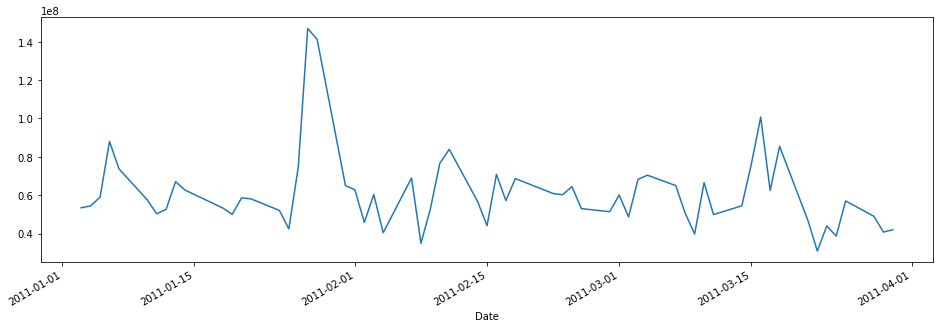

In [64]:
data["Volume"].plot(figsize=(16, 5))

In [65]:
tickers=['IBM','GOOG','XOM','CVX',
         'PG','BP','BIIB','CL','EXPE','AMGN']

data = []
for t in tickers:
  rows = yf.download(t,start="2011-1-1",end="2011-3-31")
  #print(type(rows.keys()))
  camp = rows["Volume"]
  camp.name=t
  data.append(camp)

import pandas as pd
data = pd.concat(data,axis=1) # Concatanation of data


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


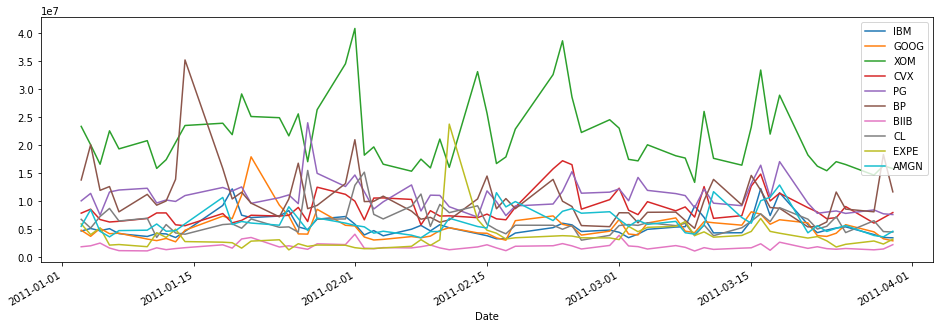

In [67]:
data.plot(figsize=(16,5))


In [42]:
!pip install sklearn

In [43]:
import numpy as np

D = np.array(data)
from sklearn.decomposition import NMF

# Non-negative matrix factorization
matrix is factorized into two matrices W and H


非負値行列因子分解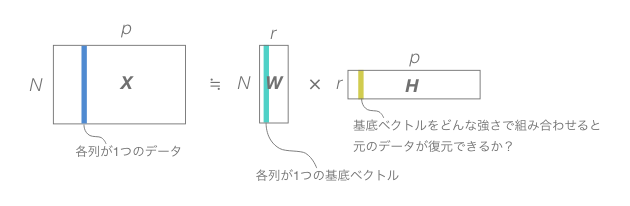

In [44]:
model = NMF(n_components = 5, init = 'random', random_state = 0 )

In [45]:
W = model.fit_transform(D)
H = model.components_

In [51]:
H.shape

(5, 10)

# Features based on W & H
program came from " Collective Intelligence, book"


In [61]:
# Loop over all the features
for i in range(H.shape[0]):
  print( "Feature %d" %i)
  
  # Get the top stocks for this feature
  ol=[(H[i,j],tickers[j]) for j in range(H.shape[1])]
  ol.sort()
  ol.reverse()
  for j in range(5):
    print( ol[j])

  # Show the top dates for this feature
  porder=[(W[d,i],d) for d in range(10)]
  porder.sort()
  porder.reverse()
  print( [(p[0],dates[p[1]]) for p in porder[0:3]])
  print("---------------------------------------")

Feature 0
(6276.110759795082, 'XOM')
(2080.904870059692, 'BP')
(1678.4073341714204, 'CVX')
(635.6024157752311, 'GOOG')
(362.4699373723982, 'BIIB')
[(3486.691397299523, '2011-01-14'), (2429.4080783320933, '2011-01-03'), (2261.073463493597, '2011-01-04')]
---------------------------------------
Feature 1
(2145.2925213313256, 'PG')
(1978.9758986258119, 'AMGN')
(1721.367758892187, 'GOOG')
(1662.837999920353, 'IBM')
(1383.9672343614652, 'CVX')
[(1483.8510757749857, '2011-01-11'), (1354.740117982025, '2011-01-07'), (1347.037756244269, '2011-01-04')]
---------------------------------------
Feature 2
(7606.257463528578, 'BP')
(2758.1511451018937, 'PG')
(1649.1150454276378, 'AMGN')
(1251.2023562392137, 'CL')
(895.5651712874271, 'IBM')
[(3666.840306764757, '2011-01-14'), (2016.7337338061752, '2011-01-04'), (1248.36005353633, '2011-01-13')]
---------------------------------------
Feature 3
(2901.6518249648075, 'PG')
(2856.227215657985, 'CL')
(2561.0577540785107, 'XOM')
(1009.2918912550155, 'CVX')

In [36]:
def showfeatures(w,h,titles,wordvec): 
  pc,wc=h.shape
  toppatterns=[[] for i in range(len(titles))]
  patternnames=[]
  
  # Loop over all the features
  for i in range(pc):
    slist=[]
    # Create a list of words and their weights
    for j in range(wc):
      slist.append((h[i,j],wordvec[j]))
    # Reverse sort the word list
    slist.sort()
    slist.reverse()
    
    # Print the first six elements
    n=[s[1] for s in slist[0:6]]
    #print(str(n)+'\n')
    patternnames.append(n)
    
    # Create a list of articles for this feature
    flist=[]
    for j in range(len(titles)):
      # Add the article with its weight
      flist.append((w[j,i],titles[j]))
      toppatterns[j].append((w[j,i],i,titles[j]))
    
    # Reverse sort the list
    flist.sort()
    flist.reverse()
    
    # Show the top 3 articles
    for f in flist[0:3]:
      print(str(f))
    print(toppatterns)
    print(patternnames)
    print("-----------------------------------")

In [46]:
dates = data.index.astype(str) # Date became str

In [47]:
showfeatures(W,H,tickers,dates)

(3486.691397299523, 'AMGN')
(2429.4080783320933, 'IBM')
(2261.073463493597, 'GOOG')
[[(2429.4080783320933, 0, 'IBM')], [(2261.073463493597, 0, 'GOOG')], [(1588.3094650549228, 0, 'XOM')], [(2257.498839999976, 0, 'CVX')], [(1720.1206193402531, 0, 'PG')], [(2027.5214887388458, 0, 'BP')], [(1482.4101943731519, 0, 'BIIB')], [(1633.831229866234, 0, 'CL')], [(2197.4391557895206, 0, 'EXPE')], [(3486.691397299523, 0, 'AMGN')]]
[['2011-01-05', '2011-01-10', '2011-01-06', '2011-01-04', '2011-01-11', '2011-01-14']]
-----------------------------------
(1483.8510757749857, 'BIIB')
(1354.740117982025, 'PG')
(1347.037756244269, 'GOOG')
[[(2429.4080783320933, 0, 'IBM'), (816.1459949841585, 1, 'IBM')], [(2261.073463493597, 0, 'GOOG'), (1347.037756244269, 1, 'GOOG')], [(1588.3094650549228, 0, 'XOM'), (744.4366301585521, 1, 'XOM')], [(2257.498839999976, 0, 'CVX'), (633.509906539863, 1, 'CVX')], [(1720.1206193402531, 0, 'PG'), (1354.740117982025, 1, 'PG')], [(2027.5214887388458, 0, 'BP'), (953.723348048532